In [15]:
##### 선형회귀 모델의 적용 #####
#모델 클래스와 모델 파라미터의 선택

#문제  회귀 sklearn -> LinearRegression(모델 클래스) -> instance -> fit() -> preditc()
#      분류

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# fit_intercept = True : 상수항을 사용하지 여부 [ y = α(상수항) + βx]
model = LinearRegression(fit_intercept = True)


In [6]:
# 와인 데이터를 가져와서 레트와인과 화이트와인 합친다.
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                      sep=";", header=0)
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                      sep=";", header=0)

redwine["type"] = "red"
whitewine["type"] = "white"
wine = redwine.append(whitewine)

In [10]:
# 특징행렬과 대상 벡터의 추출
# 특징행렬에서 type과 결과값인 quality 를 제거한다.
# 해당 특징행렬은 m(훈련데이터:행) x n(특징:열)의 구조임. 
X = wine.drop(["type","quality"], axis=1)
X.shape

(6497, 11)

In [11]:
# 대상 벡터는  quality값만 가져온다.
y = wine.quality
y.shape

(6497,)

In [12]:
# 훈련 데이터와 테스트 데이터의 분리
# 특징행렬 (훈련, 테스트), 대상벡터(훈련, 테스트)
# 특징 행렬은 대문자(X)는 2차원구조, 대상 벡터는 소문자(y)는 1차원 구조다 암묵적인 관례.

from sklearn.model_selection import train_test_split

# test_size를 설정하지 않으면 default로 훈련 75%, 테스트 25%로 만들어 진다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [17]:
# 모델의 데이터 적합.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# 파라미터는 학습 과정에서 자동으로 설정되는 매개변수.
# 하이퍼 파라미터 개발자가 어떤 모델을 컨트롤 하기 위해서 제어하기 위해서 사용하는값.

# 다중 선형 회귀, 특징이 모델의 파라미터값 11개  개수, 
model.coef_

array([ 5.55618691e-02, -1.29945358e+00, -1.08205046e-01,  4.52070539e-02,
       -3.95901596e-01,  5.76479819e-03, -2.47760359e-03, -5.30023471e+01,
        3.50283862e-01,  7.49149475e-01,  2.78530060e-01])

In [19]:
# 상수항 값.
model.intercept_

54.05800385466521

In [20]:
# 모델을 새로운 데이터에 적용
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])

In [21]:
# 예측하기
# 입력값이 1차원이라 X에 맞게 2차원으로 변경한다.
model.predict(np.reshape(newdata,(1,11)))

array([5.27273597])

In [46]:
# 테스트 데이터를 예측 해본다.
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

In [ ]:
# 예측값과 실제값을 비교해본다.



In [47]:
#### 선형회귀 모델의 성능 측정 ####
# 모델의 성능 측정
#     - 회귀 모델의 예측 능력 평가 지표:
#         평균 제곱근 오차 RMSE(Root Mean Square Error)
#     - 평균 제곱근 오차는 분산의 제곱근, 즉 표준 오차가 됨.    
#      - 0과 1사이의 값을 구하는데 0에 가까울수록 오차가 덜하다.

In [48]:
# 모델 성능을 측정하는 RMSE 함수를 만들어 보자.
# def rmse(y_real, y_pred):
#     return np.sqrt(np.mean((y_real - y_pred)**2))

# np.round(rmse(y_test, y_pred),2)

In [50]:
# RMSE함수를 제공하는 라이브러리를 사용해보자
from sklearn.metrics import mean_squared_error

# RMSE함수 = mean_squared_error(y_test, y_pred) -> np.sqrt(루트를 씌운다.)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.73

In [60]:
#### 실습 ####

#사용할 모델 선택, 선형 회귀모델
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

# 특징행렬과 대상 벡터 분리
X = wine.drop(["type", "quality"], axis=1)
y = wine.quality

# 훈련데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 모델 훈련
lr.fit(X_train, y_train)

# 11특징에대한 코에피션트
lr.coef_

# 상수항 구하기
lr.intercept_

# 테스트 데이터로 예측 해보기
y_pred = lr.predict(X_test)

# 성능 테스트
from sklearn.metrics import mean_squared_error
# 실제값과 예측값을 넣어서 성능 데이터 구하기.
# np.sqrt(mean_squared_error(y_test, y_pred))
# round로 소숫점값 정비.
np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)




0.725

In [90]:
# 실제 엑셀로 코에피션값과 상수값으로 방정식을 만들어 값을 예측해보자.



In [96]:
#### 규제가 있는 선형 회귀 모델 ####
# 규제가 있는 선형 회귀 모델 3가지 : 리지, 라쏘, 엘라스팅넷(리지와 라쏘를 결합.)
# 규제가 있는 선형 회귀 모델의 필요성.
    - 과분산 모델에 대해 모델을 규제하면 오버피팅을 감소시킬 수 있음.
    - 규제란 오버피팅된 파라미터 값에 대해 페널티를 부여하는 것
    - 페널티를 추가하게 되면 규제가 없는 회귀 모델보다 계수의 절대값이 작아지게 되는 원리를 이용해 오버피팅을 방지할 수 있음.
    - 페널티를 가한다는 것은 편향을 높인다는 것을 의미하며, 규제가 없는 모델보다 훈련 데이터와의 적합도가 떨어지지만 
       전체적인 결과는 좋아짐,.
    - 오버피팅된 모델은 지나친 노이즈를 반영할 수 있으므로 모델을 단순화 하여 좀 더 일 반화된 모델로 만들 필요가 있음.
       [규제를 두어 모델을 단순화 할 수 있는 선형 회귀 모델이 필요함.]
        
# 리지 회귀 모델
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

# 라쏘 회귀 모델
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.727

Text(0.5, 1.0, 'ridge: alpha = 50, rmse=0.733')

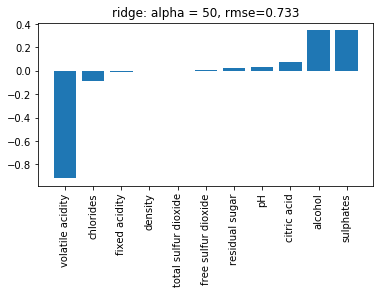

In [122]:
# 리지 회귀 모델
from sklearn.linear_model import Ridge
model_name = "ridge"
alpha = 50 #값을 변화 하면서 테스트
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()

ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title("{0}: alpha = {1}, rmse={2}".format(model_name, alpha, rmse))

In [124]:
# 리지 회귀 모델 실습

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

model_name = "ridge"
alpha = 50 #값을 변화 하면서 테스트

ridge = Ridge(alpha=alpha)

# 와인 데이터를 가져와서 레트와인과 화이트와인 합친다.
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                      sep=";", header=0)
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                      sep=";", header=0)

redwine["type"] = "red"
whitewine["type"] = "white"
wine = redwine.append(whitewine)

X = wine.drop(["type","quality"], axis=1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge.coef_

ridge.intercept_


Text(0.5, 1.0, 'ridge: alpha = 50, rmse=0.733')

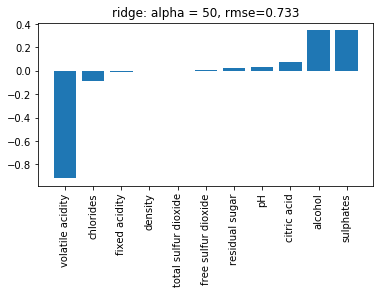

In [126]:
# 리지모델 코에피션값으로 그래프 그리기.
coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title("{0}: alpha = {1}, rmse={2}".format(model_name, alpha, rmse))

In [130]:
# 라쏘 회귀 모델

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# 와인 데이터를 가져와서 레트와인과 화이트와인 합친다.
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                      sep=";", header=0)
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                      sep=";", header=0)


In [141]:
model_name = "ridge"
alpha = 0.05 #값을 변화 하면서 테스트
lasso = Lasso(alpha=alpha)

redwine["type"]   = "red"
whitewine["type"] = "white"
wine = redwine.append(whitewine)

X = wine.drop(["type","quality"], axis=1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(lasso.coef_, index=X_test.columns).sort_values()


Text(0.5, 1.0, 'alpha 0.05 ')

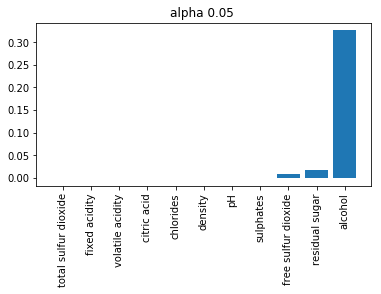

In [144]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)

#x, y에 뿌려질 값.
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation=90)
ax.set_title("alpha {} ".format(alpha))